<a href="https://colab.research.google.com/github/Osterne/codes_book/blob/main/04_inferencia_02_estatisticas_e_estimadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

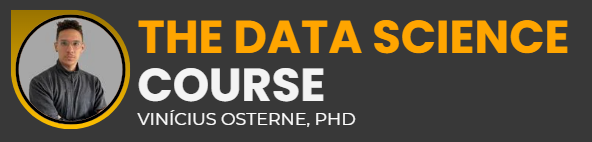

---
# Inferência Estatística - Estatísticas e Estimadores
---

Nesta aula, vamos entender:

1. A diferença entre **estatísticas** e **estimadores**;
2. Propriedades importantes das **estatísticas**, como suficiência e completude;
3. Propriedades desejáveis dos **estimadores**, como não-vício, consistência e eficiência;
4. Aplicações práticas com dados simulados.

Vamos conectar teoria com simulações para aprofundar a intuição estatística.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="dark")
np.random.seed(42)

## 1️⃣ Estatísticas e Estimadores

🔹 **Definições fundamentais**

- Uma **estatística** é **qualquer função dos dados amostrais** que **não depende de parâmetros desconhecidos**.  
  - Formalmente, dada uma amostra $X_1, X_2, \dots, X_n$,  
    uma estatística é:  
    $$T(X_1, \dots, X_n) = g(X_1, \dots, X_n)$$
    onde $g$ não envolve o parâmetro populacional $\theta$.
  - Exemplos:  
    - Soma: $\sum_{i=1}^n X_i$  
    - Média: $\frac{1}{n}\sum_{i=1}^n X_i$  
    - Variância amostral, Mediana, Mínimo, Máximo, Quantis, etc.

- Um **estimador** é uma estatística **especificamente escolhida** para **inferir um parâmetro populacional**.  
  - Ou seja, **todo estimador é uma estatística**, mas nem toda estatística é usada como estimador.  
  - Exemplo:
    - Se o parâmetro de interesse é a média populacional $\mu$,  
      então $\hat{\mu} = \frac{1}{n}\sum_{i=1}^n X_i$ é o **estimador** de $\mu$.  
    - A soma $\sum_{i=1}^n X_i$ por si só é **apenas uma estatística**,  
      mas se a usarmos junto de $1/n$ para representar a média,  
      ela se torna um estimador para $\mu$.

🔹 **Resumo**

- Estatística → função dos dados (não depende de $\theta$).
- Estimador → estatística usada para estimar um parâmetro específico.
- Estimativa → valor numérico obtido quando aplicamos o estimador a uma amostra.

💡 **Exemplo prático**

- População: alturas de todas as pessoas.
- Amostra: $X_1, \dots, X_n$.
- Estatísticas:
  - Soma: $\sum X_i$
  - Média: $\bar{X} = \frac{1}{n}\sum X_i$
  - Mediana, Máximo, etc.
- Estimador:
  - Para estimar a média populacional $\mu$, usamos $\hat{\mu} = \bar{X}$.
  - Para estimar a variância populacional $\sigma^2$, usamos $\hat{\sigma}^2 = \frac{1}{n-1}\sum (X_i - \bar{X})^2$.

Portanto, **estatística ≠ estimador**, mas **estimador ⊂ estatística**.


## 🎯 Exemplo: Estatísticas Soma vs Média

Neste exemplo, vamos ilustrar a diferença entre usar a **soma** e a **média** de uma amostra como estatísticas.

### 🧠 **Ideia do Experimento**

- Criar uma **população** simulada (altura de 100 mil pessoas).  
- Sortear várias amostras da população.  
- Para cada amostra, calcular:  
  - **Estatística Soma**:  
$$
\text{Soma} = \sum_{i=1}^{n} X_i
$$
  - **Estimador de Média**:  
$$
\hat{\mu} = \frac{1}{n}\sum_{i=1}^{n} X_i
$$
- Mostrar:
  - Distribuição das **somas** (estatística, não usada diretamente para inferir \(\mu\)).  
  - Distribuição das **médias** (estimador não viciado de \(\mu\)).  
- Comparar ambas com a **média verdadeira da população**.

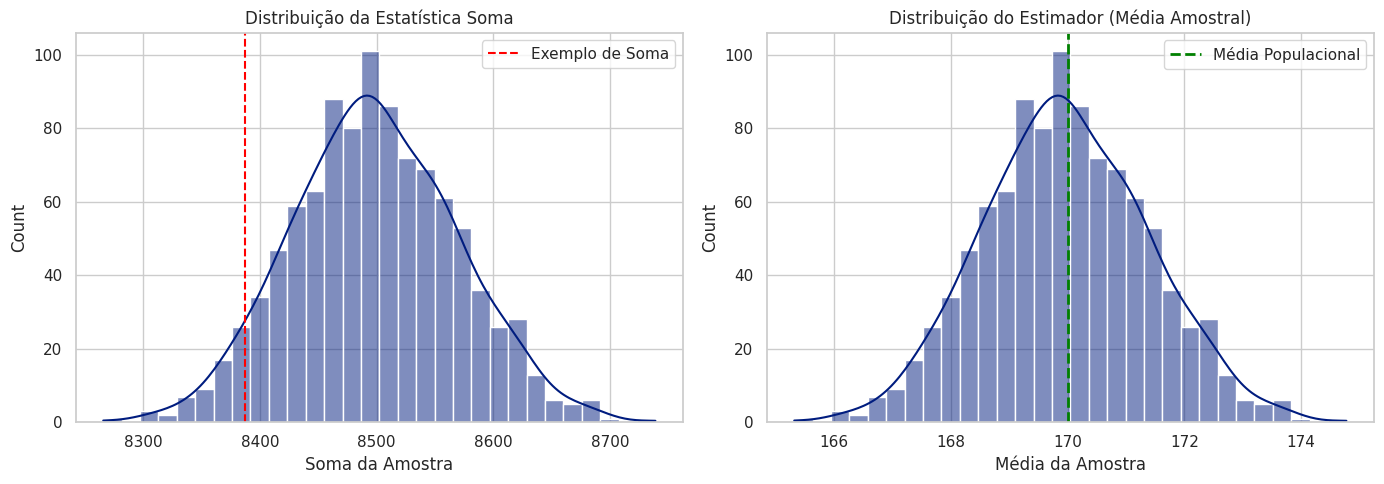

Média verdadeira da população: 170.01
Média das médias amostrais: 169.97


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# População
populacao = np.random.normal(loc=170, scale=10, size=100_000)
media_pop = np.mean(populacao)

# Parâmetros da simulação
num_amostras = 1000
n = 50

# Estatísticas coletadas
somas = []
medias = []

for _ in range(num_amostras):
    amostra = np.random.choice(populacao, size=n, replace=False)
    somas.append(np.sum(amostra))        # Estatística: soma
    medias.append(np.mean(amostra))      # Estimador: média amostral

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma das somas
sns.histplot(somas, bins=30, kde=True, ax=axes[0])
axes[0].axvline(np.sum(populacao[:n]), color='red', linestyle='--', label='Exemplo de Soma')
axes[0].set_title("Distribuição da Estatística Soma")
axes[0].set_xlabel("Soma da Amostra")
axes[0].legend()

# Histograma das médias
sns.histplot(medias, bins=30, kde=True, ax=axes[1])
axes[1].axvline(media_pop, color='green', linestyle='--', linewidth=2, label='Média Populacional')
axes[1].set_title("Distribuição do Estimador (Média Amostral)")
axes[1].set_xlabel("Média da Amostra")
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"Média verdadeira da população: {media_pop:.2f}")
print(f"Média das médias amostrais: {np.mean(medias):.2f}")


Nos dois gráficos gerados:

### 🔹 Gráfico da Esquerda – **Soma**

- O eixo $x$ representa a **soma** dos valores da amostra:
  $$
  S = \sum_{i=1}^n X_i
  $$
- Como cada amostra tem $n = 50$ observações e a média populacional é $\mu \approx 170$,  
  o valor esperado da soma é:
  $$
  \mathbb{E}[S] = n \cdot \mu \approx 50 \times 170 = 8500
  $$
- Portanto, os valores no eixo $x$ ficam **na casa dos milhares**.
- Essa soma é **uma estatística**, mas **não é diretamente usada** para estimar $\mu$ porque não está na mesma escala da média populacional.

### 🔹 Gráfico da Direita – **Média Amostral**

- O eixo $x$ representa a **média** das observações:
  $$
  \bar{X} = \frac{1}{n} S
  $$
- O valor esperado é:
  $$
  \mathbb{E}[\bar{X}] = \mu = 170
  $$
- Aqui vemos que a distribuição da média amostral é **centrada na média verdadeira** da população.
- Isso mostra que a média amostral é um **estimador não-viciado** de $\mu$.

### ✅ Conclusão

- Tanto a soma quanto a média são **estatísticas**.
- Mas apenas a média (normalizada pela amostra) é um **estimador adequado** para inferir a média populacional, pois está na mesma escala de $\mu$ e não possui viés.


---
## 2️⃣ Propriedades das Estatísticas

Agora que entendemos o que é uma **estatística**, vamos estudar duas propriedades
fundamentais que são importantes na construção de bons estimadores: **suficiência** e **completude**.


### 🔹 Estatística Suficiente

- Uma estatística $T(X)$ é **suficiente** para o parâmetro $\theta$ se **contém toda a informação** sobre esse parâmetro presente na amostra completa $X_1, \dots, X_n$.
- Intuitivamente:
  - Se conhecemos $T(X)$, **não precisamos da amostra inteira** para inferir $\theta$, pois não há perda de informação.
- Formalmente, usamos o **Teorema de Fatoração de Neyman**:
  - A estatística $T(X)$ é suficiente para $\theta$ se a função de verossimilhança pode ser escrita como:
$$
f(x|\theta) = g(T(x), \theta) \cdot h(x)
$$

    - $g(T(x), \theta)$ → parte que depende da estatística e do parâmetro.
    - $h(x)$ → parte que não depende do parâmetro.
- Exemplo:
  - Amostra $X_1, \dots, X_n$ de uma distribuição Normal com média $\mu$ e variância conhecida $\sigma^2$.
  - A função de verossimilhança pode ser fatorada de forma que a **média amostral $\bar{X}$ é suficiente** para $\mu$.
- **Por que isso importa?**
  - Se existe uma estatística suficiente, qualquer estimador ótimo para $\theta$ deve ser função dela (não faz sentido usar mais dados além de $T(X)$).


### 🔹 Estatística Completa

- Uma estatística $T(X)$ é **completa** se:
  - Para qualquer função $g$, se:
$$
\mathbb{E}_\theta[g(T(X))] = 0 \quad \text{para todo } \theta
$$
então:
$$
g(T(X)) = 0 \quad \text{quase sempre}.
$$
- Intuição:
  - Uma estatística completa não permite criar funções não triviais que “sumam” em média para zero para todos os valores do parâmetro.
  - Isso garante **unicidade** de estimadores ótimos.
- Importância:
  - Usada no **Teorema de Lehmann-Scheffé**, que diz:
    - Se temos um estimador não-viciado baseado em uma estatística **suficiente e completa**, ele é o **MVUE** (estimador não-viciado de variância mínima).
- Exemplo:
  - Na distribuição Normal com média $\mu$ e variância conhecida, a média amostral $\bar{X}$ é não apenas suficiente, mas também completa.


### ✅ Conexão prática

- Estatísticas suficientes **resumem dados** sem perda de informação.
- Estatísticas completas ajudam a garantir que o estimador encontrado é **único e ótimo**.
- Na prática, buscamos estatísticas que sejam **suficientes** (para eficiência) e, idealmente, também **completas** (para garantir unicidade).

Média da amostra (estatística suficiente): 170.60
Usando apenas X1 (não suficiente): 166.39


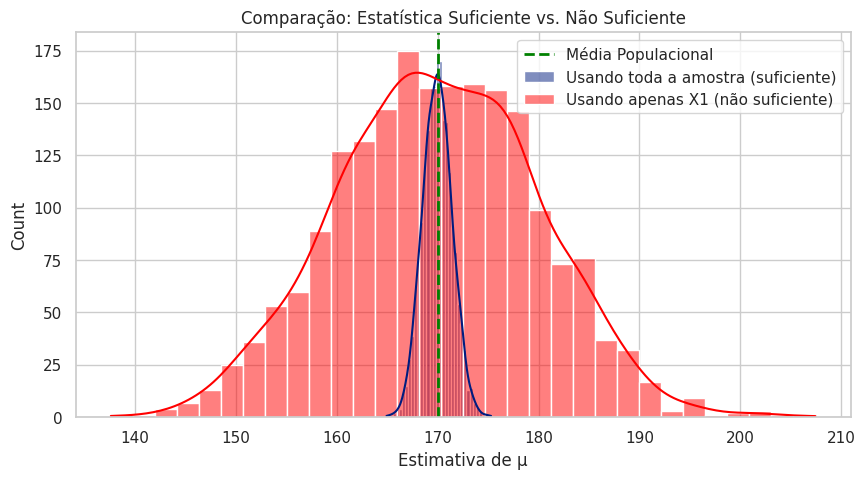

Variância usando toda a amostra: 2.1098
Variância usando apenas X1: 98.5584


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# População Normal
mu = 170
sigma = 10
populacao = np.random.normal(loc=mu, scale=sigma, size=100_000)

# Amostra
n = 50
amostra = np.random.choice(populacao, size=n, replace=False)

# Estatísticas
media_amostra = np.mean(amostra)
um_ponto = amostra[0]  # estimador alternativo (não suficiente)

print(f"Média da amostra (estatística suficiente): {media_amostra:.2f}")
print(f"Usando apenas X1 (não suficiente): {um_ponto:.2f}")

# Simulação para variâncias
N = 2000
estimativas_media = []
estimativas_x1 = []

for _ in range(N):
    amostra_temp = np.random.choice(populacao, size=n, replace=False)
    estimativas_media.append(np.mean(amostra_temp))
    estimativas_x1.append(amostra_temp[0])

# Plotando distribuições dos dois estimadores
plt.figure(figsize=(10,5))
sns.histplot(estimativas_media, kde=True, label='Usando toda a amostra (suficiente)')
sns.histplot(estimativas_x1, kde=True, label='Usando apenas X1 (não suficiente)', color='red')
plt.axvline(mu, color='green', linestyle='--', linewidth=2, label='Média Populacional')
plt.title("Comparação: Estatística Suficiente vs. Não Suficiente")
plt.xlabel("Estimativa de μ")
plt.legend()
plt.show()

print(f"Variância usando toda a amostra: {np.var(estimativas_media):.4f}")
print(f"Variância usando apenas X1: {np.var(estimativas_x1):.4f}")


### 🔎 Exemplo prático – Estatística Suficiente

- População: Normal com média $\mu = 170$, desvio $\sigma = 10$.
- Duas formas de estimar $\mu$:
  1. **Usando a média de toda a amostra** ($\bar{X}$) → Estatística Suficiente.
  2. **Usando apenas o primeiro ponto** ($X_1$) → Estatística Não Suficiente.


### 📊 Resultados:

- A média de toda a amostra tem **variância muito menor**.
- Isso mostra que $\bar{X}$ contém **toda a informação** sobre $\mu$.
- Usar apenas um ponto perde informação → estimador menos eficiente.


### ✅ Conexão Teórica:

- Pelo **Teorema de Fatoração**, a função de verossimilhança da Normal pode ser escrita como:
  $$
  f(x_1, \dots, x_n|\mu) = g\bigg(\bar{X}, \mu\bigg) \cdot h(x_1, \dots, x_n)
  $$
- Isso prova que $\bar{X}$ é uma **estatística suficiente** para $\mu$.
- Como também é **completa**, pelo Teorema de Lehmann-Scheffé, a média amostral é o **MVUE** (melhor estimador não-viciado).


---
## 3️⃣ Propriedades dos Estimadores


### 🔸 Estimador Não Viciado

Um estimador $\hat{\theta}$ é **não viciado** se:

$$
\mathbb{E}[\hat{\theta}] = \theta
$$

Ou seja, se tirarmos **várias amostras** e calculamos o estimador em cada uma,
a **média dessas estimativas** será igual ao verdadeiro valor do parâmetro.

Vamos demonstrar isso para a **média amostral** $\hat{\mu} = \bar{X}$ usando simulação.


In [21]:
import numpy as np

np.random.seed(42)

# População
mu = 170
sigma = 10
populacao = np.random.normal(loc=mu, scale=sigma, size=100_000)

# Simulação: várias amostras e médias
n = 50
N_sim = 5000
medias_estimadas = [np.mean(np.random.choice(populacao, size=n, replace=False)) for _ in range(N_sim)]

media_estimador = np.mean(medias_estimadas)

print(f"Média verdadeira da população: {mu}")
print(f"Média das estimativas: {media_estimador:.2f}")
print(f"Viés (diferença): {media_estimador - mu:.4f}")

Média verdadeira da população: 170
Média das estimativas: 170.00
Viés (diferença): 0.0013


### 🔸 Eficiência

Entre os estimadores **não viciados**, consideramos **mais eficiente** aquele que possui a **menor variância**.

Se dois estimadores $\hat{\theta}_1$ e $\hat{\theta}_2$ são não viciados, mas:

$$
\text{Var}(\hat{\theta}_1) < \text{Var}(\hat{\theta}_2)
$$

então $\hat{\theta}_1$ é **mais eficiente**.

Vamos demonstrar isso comparando:

1. $\hat{\mu}_1$: média da amostra completa (eficiente);
2. $\hat{\mu}_2$: média de apenas metade da amostra (não viciado, mas menos eficiente).


In [22]:
import numpy as np

np.random.seed(42)

# População
mu = 170
sigma = 10
populacao = np.random.normal(loc=mu, scale=sigma, size=100_000)

# Simulação
n = 50
N_sim = 5000

estimador_eficiente = []
estimador_menos_eficiente = []

for _ in range(N_sim):
    amostra = np.random.choice(populacao, size=n, replace=False)
    estimador_eficiente.append(np.mean(amostra))
    estimador_menos_eficiente.append(np.mean(amostra[:n//2]))  # usa apenas metade da amostra

# Cálculo de variâncias
var_eficiente = np.var(estimador_eficiente)
var_menos_eficiente = np.var(estimador_menos_eficiente)

print(f"Variância usando toda a amostra: {var_eficiente:.4f}")
print(f"Variância usando metade da amostra: {var_menos_eficiente:.4f}")

Variância usando toda a amostra: 2.0009
Variância usando metade da amostra: 4.0810


### 🔸 MVUE e Rao-Blackwell

- **MVUE (Minimum Variance Unbiased Estimator):**  
  É o **melhor estimador não viciado**, ou seja, aquele com a **menor variância possível** entre todos os estimadores não viciados.

- **Teorema de Rao-Blackwell:**  
  Se temos um estimador $ \tilde{\theta} $ (não viciado) e uma estatística suficiente $ T(X) $ para o parâmetro $ \theta $, podemos **melhorar** esse estimador fazendo:

  $$
  \hat{\theta}_{RB} = \mathbb{E}[\tilde{\theta} \mid T(X)]
  $$

  Esse novo estimador $ \hat{\theta}_{RB} $:
  - Continua sendo **não viciado** (mesma esperança que $ \tilde{\theta} $);
  - Tem **variância menor ou igual** à do estimador original (melhor precisão);
  - Se a estatística for também **completa**, o resultado será o **MVUE** (estimador não viciado de variância mínima).


### 💡 Intuição

- O estimador inicial $ \tilde{\theta} $ pode **não usar toda a informação** dos dados, resultando em variância desnecessariamente alta.
- A estatística suficiente $ T(X) $ contém **toda a informação relevante** sobre $ \theta $.
- Ao condicionar o estimador inicial nessa estatística suficiente, **aproveitamos ao máximo a informação** e melhoramos o estimador:

  $$
  \hat{\theta}_{RB} = \mathbb{E}[\tilde{\theta} \mid T(X)]
  $$

- Se $ T(X) $ também for completa, então $ \hat{\theta}_{RB} $ é garantidamente o **MVUE**.


### 🔢 Exemplo

- População: $ X_i \sim \mathcal{N}(\mu, \sigma^2) $
- Estimador inicial: $ X_1 $ (apenas a primeira observação) é **não viciado** para $ \mu $, mas usa pouca informação.
- Estatística suficiente: a média amostral $ \bar{X} $ (contém toda a informação sobre $ \mu $).
- Aplicando Rao-Blackwell:

  $$
  \hat{\mu}_{RB} = \mathbb{E}[X_1 \mid \bar{X}] = \bar{X}
  $$

- Resultado:
  - Ambos têm o mesmo valor esperado ($ \mu $)
  - Mas a variância da média $ \text{Var}(\bar{X}) = \sigma^2 / n $ é **muito menor** que $ \text{Var}(X_1) = \sigma^2 $
  - Portanto, $ \bar{X} $ é o **MVUE** para $ \mu $

In [23]:
import numpy as np

np.random.seed(42)

# População
mu = 170
sigma = 10
populacao = np.random.normal(loc=mu, scale=sigma, size=100_000)

# Simulação
n = 50
N_sim = 5000

estimador_inicial = []   # usa só a primeira observação
rao_blackwellizado = []  # usa a média (estatística suficiente)

for _ in range(N_sim):
    amostra = np.random.choice(populacao, size=n, replace=False)
    estimador_inicial.append(amostra[0])       # má estimativa
    rao_blackwellizado.append(np.mean(amostra))  # melhorada via média

# Variâncias
var_inicial = np.var(estimador_inicial)
var_rb = np.var(rao_blackwellizado)

print(f"Variância do estimador inicial (X1): {var_inicial:.4f}")
print(f"Variância após Rao-Blackwell (média): {var_rb:.4f}")


Variância do estimador inicial (X1): 98.0015
Variância após Rao-Blackwell (média): 2.0009


### 🔸 Consistência

Um estimador $\hat{\theta}_n$ é **consistente** se:

$$
\hat{\theta}_n \xrightarrow{p} \theta \quad \text{à medida que } n \to \infty
$$

Ou seja, quando aumentamos o tamanho da amostra:

- A **variância do estimador diminui**;
- O estimador se aproxima do verdadeiro valor do parâmetro.

🔹 Exemplo: A média amostral $\hat{\mu}_n = \bar{X}$ é consistente para a média populacional $\mu$, pois:

$$
\lim_{n \to \infty} P(|\bar{X} - \mu| > \varepsilon) = 0
$$

Vamos simular e visualizar essa propriedade.


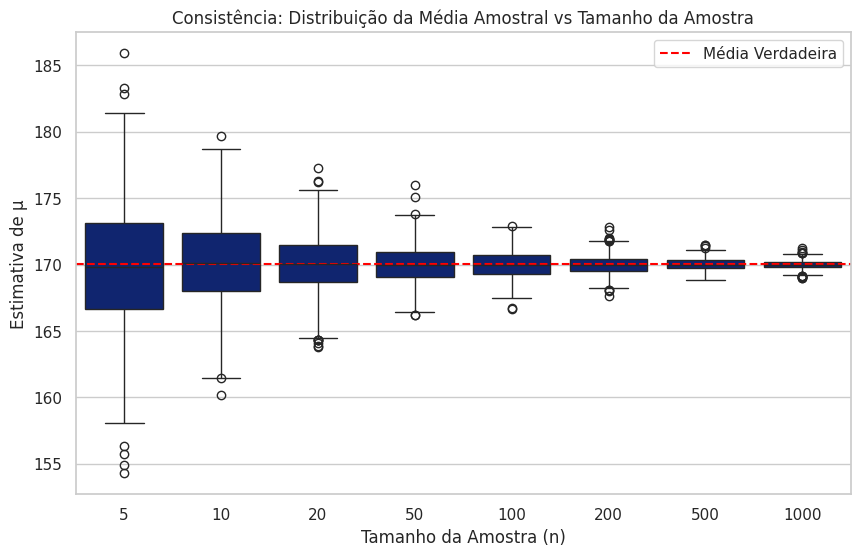

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# População
populacao = np.random.normal(loc=170, scale=10, size=100_000)
media_pop = np.mean(populacao)

# Diferentes tamanhos de amostra
n_values = [5, 10, 20, 50, 100, 200, 500, 1000]
N_sim = 1000  # número de amostras para cada n

resultados = []

for n in n_values:
    medias_temp = [np.mean(np.random.choice(populacao, size=n, replace=False)) for _ in range(N_sim)]
    for m in medias_temp:
        resultados.append({"Tamanho": n, "Média_estimada": m})

df_resultados = pd.DataFrame(resultados)

plt.figure(figsize=(10,6))
sns.boxplot(x="Tamanho", y="Média_estimada", data=df_resultados)
plt.axhline(media_pop, color='red', linestyle='--', label='Média Verdadeira')
plt.title("Consistência: Distribuição da Média Amostral vs Tamanho da Amostra")
plt.xlabel("Tamanho da Amostra (n)")
plt.ylabel("Estimativa de μ")
plt.legend()
plt.show()

## 🔸 Eficiência e Limite de Cramér-Rao

Um estimador **eficiente** é aquele que atinge a **menor variância possível** entre todos os estimadores não viciados.

O **limite de Cramér-Rao** estabelece essa variância mínima:

$$
\text{Var}(\hat{\theta}) \geq \frac{1}{I(\theta)}
$$

onde $I(\theta)$ é a **informação de Fisher**, que mede a quantidade de informação sobre $\theta$ presente nos dados.

### 📌 Exemplo: Média amostral

- População: Normal $(\mu, \sigma^2)$ com $\sigma$ conhecido.
- Para estimar $\mu$, a informação de Fisher é:

$$
I(\mu) = \frac{n}{\sigma^2}
$$

Portanto, o limite de Cramér-Rao é:

$$
\text{Var}(\hat{\mu}) \geq \frac{1}{I(\mu)} = \frac{\sigma^2}{n}
$$

A **média amostral** atinge exatamente essa variância, ou seja, é **um estimador eficiente**.

Vamos verificar isso via simulação.


Variância do estimador (simulação): 2.0262
Limite de Cramér-Rao: 2.0000


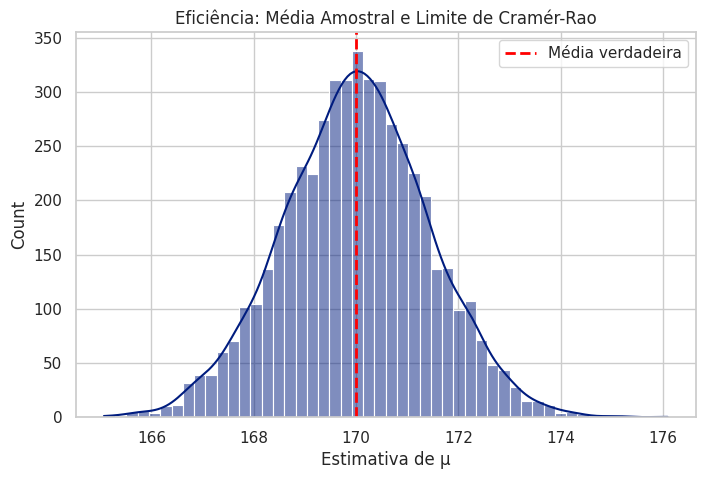

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# População
mu = 170
sigma = 10
n = 50
N_sim = 5000

# Média amostral
medias_estimadas = [np.mean(np.random.normal(loc=mu, scale=sigma, size=n)) for _ in range(N_sim)]
variancia_estimador = np.var(medias_estimadas)

# Limite de Cramér-Rao
cramer_rao = sigma**2 / n

print(f"Variância do estimador (simulação): {variancia_estimador:.4f}")
print(f"Limite de Cramér-Rao: {cramer_rao:.4f}")

plt.figure(figsize=(8,5))
sns.histplot(medias_estimadas, kde=True)
plt.axvline(mu, color='red', linestyle='--', linewidth=2, label='Média verdadeira')
plt.title("Eficiência: Média Amostral e Limite de Cramér-Rao")
plt.xlabel("Estimativa de μ")
plt.legend()
plt.show()

---
## ✅ Conclusão

- Estatísticas e estimadores são os pilares da inferência estatística.
- Boas estatísticas (suficientes e completas) ajudam a construir estimadores ótimos.
- Bons estimadores são não-viciados, consistentes e eficientes.


---

### 🧪 Tarefa de casa

1. Crie um estimador alternativo para a média baseado em apenas 10% da amostra.
2. Compare seu viés e variância com a média amostral tradicional.
3. Tente aplicar o Teorema de Rao-Blackwell para melhorá-lo.